<a href="https://colab.research.google.com/github/gedeon129/Data-205---/blob/main/Final_report_205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                        Project

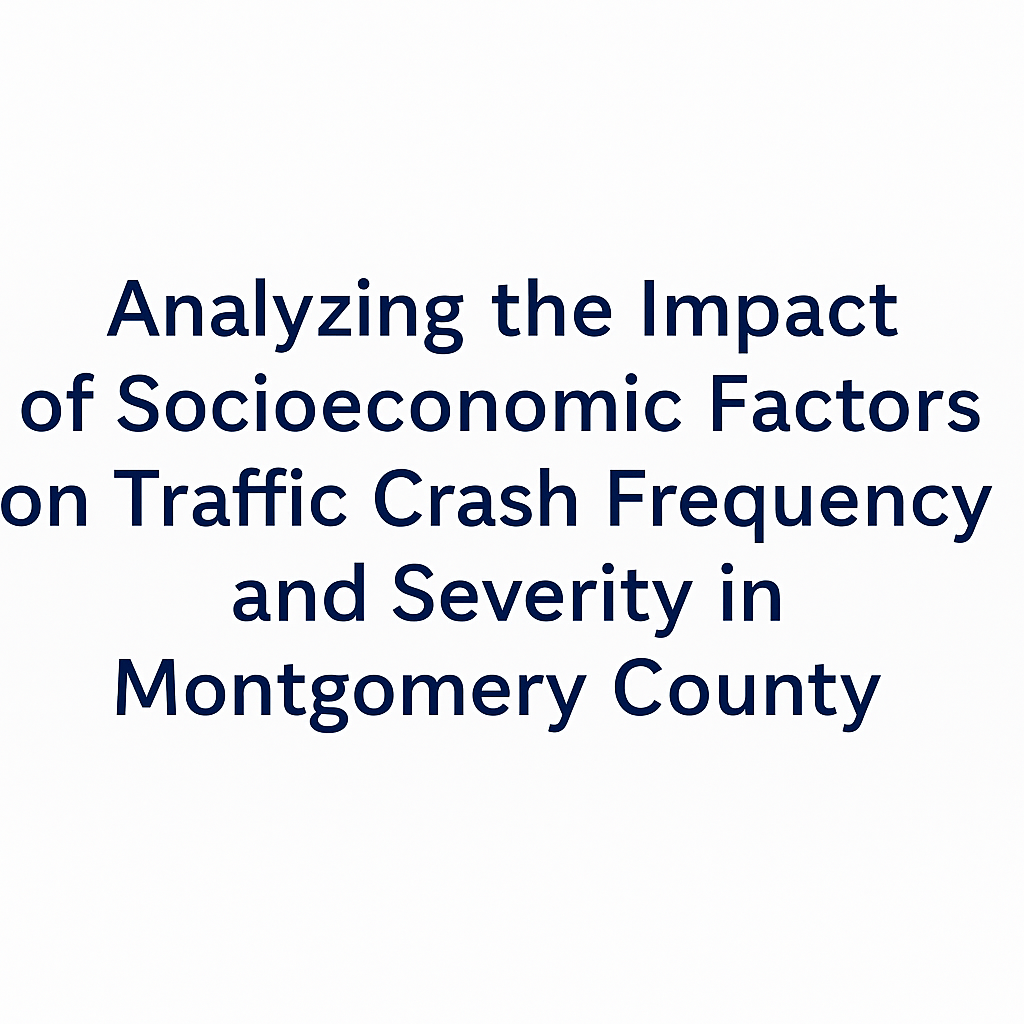


                      Introduction(overview):

                      


                



Income Dataset – Provides median household income estimates for 46 ZIP codes, sourced from: https://data.census.gov, https://www.incomebyzipcode.com/maryland/, and https://worldpopulationreview.com/zips/maryland


Crash Reporting Dataset – Contains detailed records of traffic collisions collected by the Maryland State Police through the Automated Crash Reporting System (ACRS), with reports from county and municipal police. Source: Montgomery County Data | Open Data Portal.


Crime Dataset – Includes reported crime data classified under the National Incident-Based                     Reporting System (NIBRS) and compiled using the EJustice system, widely used by local law enforcement.: Montgomery County Data | Open Data Portal.


Goals: Goal 1: To analyze, understand, and potentially predict the key factors that contribute to the severity and frequency of traffic crashes in Montgomery County


Goal 2: Examine how traffic crash rates in Montgomery County vary by household income levels across ZIP codes, as well as crime report incidents

These goals are important because they use data to make Montgomery County safer and fairer for everyone. Instead of just dealing with crashes after they happen, these goals try to figure out why they happen in the first place, so we can stop them from happening.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from geopy.distance import geodesic
import folium
from folium.plugins import HeatMap



                                 Load dataset

In [ ]:
crash_df = pd.read_excel('/content/Cleaned_Crash_Reporting_Incidents_Data.xlsx')

In [ ]:
print("Crash Data:")
print(crash_df.head())

Crash Data:
  report_number local_case_number                agency_name  \
0   MCP1123002M         190010046   Montgomery County Police   
1   MCP21610009          16028039   Montgomery County Police   
2   MCP2790000P          15041420                 MONTGOMERY   
3   MCP3378000J         230051006   Montgomery County Police   
4    DD5659000H         230049130  Rockville Police Departme   

        acrs_report_type     crash_date_time hit_run        route_type  \
0           Injury Crash 2019-03-04 08:41:00      No  Maryland (State)   
1  Property Damage Crash 2016-06-04 19:14:00     Yes            County   
2  Property Damage Crash 2015-08-18 23:00:00      No            County   
3           Injury Crash 2023-08-24 07:46:00      No  Maryland (State)   
4  Property Damage Crash 2023-08-12 16:28:00     Yes  Maryland (State)   

  lane_direction  number_of_lanes direction  ...  driver_substance_abuse  \
0           West                2      East  ...           NONE DETECTED   
1     

In [ ]:
crash_df.head()

report_number local_case_number                agency_name  \
0   MCP1123002M         190010046   Montgomery County Police   
1   MCP21610009          16028039   Montgomery County Police   
2   MCP2790000P          15041420                 MONTGOMERY   
3   MCP3378000J         230051006   Montgomery County Police   
4    DD5659000H         230049130  Rockville Police Departme   

        acrs_report_type     crash_date_time hit_run        route_type  \
0           Injury Crash 2019-03-04 08:41:00      No  Maryland (State)   
1  Property Damage Crash 2016-06-04 19:14:00     Yes            County   
2  Property Damage Crash 2015-08-18 23:00:00      No            County   
3           Injury Crash 2023-08-24 07:46:00      No  Maryland (State)   
4  Property Damage Crash 2023-08-12 16:28:00     Yes  Maryland (State)   

  lane_direction  number_of_lanes direction  ...  driver_substance_abuse  \
0           West                2      East  ...           NONE DETECTED   
1           East                1      East  ...                 UNKNOWN   
2          South                2     South  ...           NONE DETECTED   
3           West                4      West  ...           NONE DETECTED   
4          South                3     South  ...                     NaN   

  non-motorist_substance_abuse first_harmful_event          junction  \
0                          NaN       OTHER VEHICLE  NON INTERSECTION   
1                          NaN      PARKED VEHICLE  NON INTERSECTION   
2                          NaN      PARKED VEHICLE  NON INTERSECTION   
3                          NaN                 NaN  NON INTERSECTION   
4                          NaN       OTHER VEHICLE               NaN   

  road_alignment road_condition                              road_division  \
0       STRAIGHT     NO DEFECTS                       TWO-WAY, NOT DIVIDED   
1       STRAIGHT     NO DEFECTS                       TWO-WAY, NOT DIVIDED   
2       STRAIGHT     NO DEFECTS                       TWO-WAY, NOT DIVIDED   
3     CURVE LEFT     NO DEFECTS  TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER   
4       STRAIGHT     NO DEFECTS                       TWO-WAY, NOT DIVIDED   

    latitude  longitude                     location  
0  39.113113 -77.057592  (39.11311333, -77.05759167)  
1  38.982443 -77.079235    (38.98244333, -77.079235)  
2  39.189845 -77.230325      (39.189845, -77.230325)  
3  39.041698 -77.050125    (39.04169833, -77.050125)  
4  39.084720 -77.148200         (39.08472, -77.1482)  

[5 rows x 32 columns]

In [ ]:
crime_df = pd.read_csv('/content/Cleaned_Crime.csv')

In [ ]:
crime_df.describe()

incident_id   offence_code     cr_number        victims      zip_code  \
count  4.392640e+05  439260.000000  4.392640e+05  439264.000000  435937.00000   
mean   2.013021e+08    4213.063930  1.886921e+08       1.021593   20876.82656   
std    1.248134e+05    2833.247981  5.990763e+07       0.184077     142.51725   
min    2.010871e+08     301.000000  1.001107e+07       1.000000       6.00000   
25%    2.011947e+08    2305.000000  1.800316e+08       1.000000   20853.00000   
50%    2.012999e+08    2610.000000  2.000331e+08       1.000000   20878.00000   
75%    2.014076e+08    5404.000000  2.200587e+08       1.000000   20904.00000   
max    2.015230e+08    9201.000000  2.500575e+08      22.000000   29882.00000   

            latitude      longitude  
count  439264.000000  439264.000000  
mean       37.795952     -74.577884  
std         6.971365      13.755323  
min         0.000000     -77.516700  
25%        39.019330     -77.197400  
50%        39.072000     -77.098700  
75%        39.141570     -77.027900  
max        39.351240       0.000000

In [ ]:
crime_df.head()

incident_id  offence_code  cr_number  victims             crime_name1  \
0    201166610        2308.0  170548599        1  Crime Against Property   
1    201359823        5404.0  220000965        1   Crime Against Society   
2    201095140        2303.0   16043118        1  Crime Against Property   
3    201090710        5707.0   16037677        1   Crime Against Society   
4    201362142        2901.0  220003839        1  Crime Against Property   

                                crime_name2  \
0                       Theft from Building   
1               Driving Under the Influence   
2                               Shoplifting   
3                 Trespass of Real Property   
4  Destruction/Damage/Vandalism of Property   

                          crime_name3 police_district_name           city  \
0                 LARCENY - FROM BLDG            ROCKVILLE      ROCKVILLE   
1  DRIVING UNDER THE INFLUENCE LIQUOR   MONTGOMERY VILLAGE   GAITHERSBURG   
2               LARCENY - SHOPLIFTING            ROCKVILLE      ROCKVILLE   
3                         TRESPASSING              WHEATON  SILVER SPRING   
4          DAMAGE PROPERTY - BUSINESS   MONTGOMERY VILLAGE   GAITHERSBURG   

  state  ...  sector beat  pra street_prefix street_name street_suffix  \
0    MD  ...       A  1A1  270             E   JEFFERSON           NaN   
1    MD  ...       P  6P2  428             N   FREDERICK           NaN   
2    MD  ...       A  1A2  271           NaN         BOU           NaN   
3    MD  ...       L  4L2  321           NaN  VEIRS MILL           NaN   
4    MD  ...       R  6R2  545             N   FREDERICK           NaN   

  street_type  latitude longitude police_district_number  
0          ST  39.05848  -77.1264                     1D  
1         AVE  39.09438  -77.1517                     6D  
2         AVE  39.05597  -77.1136                     1D  
3          RD  39.03758  -77.0519                     4D  
4         AVE  39.16059  -77.2209                     6D  

[5 rows x 23 columns]

In [ ]:
salary_df = pd.read_excel('/content/Montgomery_County_Median_Income_by_ZIP.xlsx')

In [ ]:
salary_df.head()

zip_code  median_household_income      county state
0    20814                    80795  Montgomery    MD
1    20815                    65860  Montgomery    MD
2    20816                   168694  Montgomery    MD
3    20817                   175268  Montgomery    MD
4    20818                   141820  Montgomery    MD

In [ ]:
salary_df.describe()

zip_code  median_household_income
count     46.000000                46.000000
mean   20866.413043            122699.739130
std       28.706620             32490.606035
min    20814.000000             65769.000000
25%    20844.000000             97606.500000
50%    20869.500000            128887.500000
75%    20890.500000            147924.500000
max    20912.000000            177727.000000

                                     Data cleaning

                                         Crash Data

In [ ]:
# Clean column names
crash_df.columns = crash_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the column names to verify the actual name
print(crash_df.columns)
original_date_column = next(col for col in crash_df.columns if 'crash_date' in col and 'time' in col)

# Convert date to datetime using the original column name
crash_df['crash_date/time'] = pd.to_datetime(crash_df[original_date_column], errors='coerce')

# Check if 'location' column exists before dropping
if 'location' in crash_df.columns:
    # Drop unnecessary columns (example)
    crash_df.drop(columns=['location'], inplace=True)  # Ensure 'location' column exists
    print("Column 'location' dropped successfully.")
else:
    print("Column 'location' not found in DataFrame. Skipping drop.")
# Handle missing data
crash_df.dropna(subset=['latitude', 'longitude'], inplace=True)

Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'hit_run', 'route_type', 'lane_direction',
       'number_of_lanes', 'direction', 'distance', 'distance_unit',
       'road_grade', 'road_name', 'cross-street_name', 'off-road_description',
       'at_fault', 'collision_type', 'weather', 'surface_condition', 'light',
       'traffic_control', 'driver_substance_abuse',
       'non-motorist_substance_abuse', 'first_harmful_event', 'junction',
       'road_alignment', 'road_condition', 'road_division', 'latitude',
       'longitude', 'location'],
      dtype='object')
Column 'location' dropped successfully.


In [ ]:
crash_df.isnull().sum()

report_number                        0
local_case_number                    0
agency_name                          0
acrs_report_type                     0
crash_date_time                      0
hit_run                              0
route_type                       14444
lane_direction                   13805
number_of_lanes                      0
direction                        13787
distance                             0
distance_unit                    12328
road_grade                       14415
road_name                        15239
cross-street_name                20242
off-road_description             95622
at_fault                             0
collision_type                     504
weather                              0
surface_condition                    0
light                                0
traffic_control                      0
driver_substance_abuse           15694
non-motorist_substance_abuse    104386
first_harmful_event                650
junction                         27887
road_alignment                   14197
road_condition                   19101
road_division                    14977
latitude                             0
longitude                            0
location                             0
dtype: int64

                        Crime Data

In [ ]:
# Clean column names of crime_df
crime_df.columns = crime_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the column names to verify the actual name
print(crime_df.columns)

#
original_date_column_crime = next((col for col in crime_df.columns if 'start_date' in col and 'time' in col), None)

# Convert to datetime if the column is found
if original_date_column_crime:
    crime_df['start_date_time'] = pd.to_datetime(crime_df[original_date_column_crime], errors='coerce')
else:
    print("Column containing 'start_date' and 'time' not found in crime_df")

# ... rest of your code ...

Index(['incident_id', 'offence_code', 'cr_number', 'victims', 'crime_name1',
       'crime_name2', 'crime_name3', 'police_district_name', 'city', 'state',
       'zip_code', 'agency', 'place', 'sector', 'beat', 'pra', 'street_prefix',
       'street_name', 'street_suffix', 'street_type', 'latitude', 'longitude',
       'police_district_number', 'zip_like'],
      dtype='object')
Column containing 'start_date' and 'time' not found in crime_df


In [ ]:
crime_df.isnull().sum()

incident_id                    0
offence_code                   4
cr_number                      0
victims                        0
crime_name1                    0
crime_name2                    0
crime_name3                    0
police_district_name        1383
city                          90
state                       9498
zip_code                    3327
agency                         0
place                          0
sector                         0
beat                           0
pra                            9
street_prefix             419378
street_name                 1186
street_suffix             433234
street_type                 1571
latitude                       0
longitude                      0
police_district_number         0
zip_like                       0
dtype: int64

                                        **Median houshold income **

In [ ]:
salary_df.columns = salary_df.columns.str.strip().str.lower().str.replace(' ', '_')  # Clean column names

# Print the actual column names after cleaning
print(salary_df.columns)

# Check if the expected columns exist
expected_columns = ['zip_code', 'median_household_income', 'county', 'state']
for col in expected_columns:
    if col not in salary_df.columns:
        print(f"Warning: Column '{col}' not found in salary_df")

# Access columns, replacing missing ones with empty Series if necessary
selected_columns = [col for col in expected_columns if col in salary_df.columns]
salary_df[selected_columns].describe()
actual_income_column = next((col for col in salary_df.columns if 'median' in col and 'income' in col), None)

if actual_income_column:
    salary_df[actual_income_column].value_counts()
else:
    print("Column containing 'median' and 'income' not found in salary_df")

salary_df.isnull().mean().sort_values(ascending=False).head(10)

Index(['zip_code', 'median_household_income', 'county', 'state'], dtype='object')


zip_code                   0.0
median_household_income    0.0
county                     0.0
state                      0.0
dtype: float64

                                            ** Visualizatio**ns





---**                               Analyze Trends in Traffic Collisions Over Time**

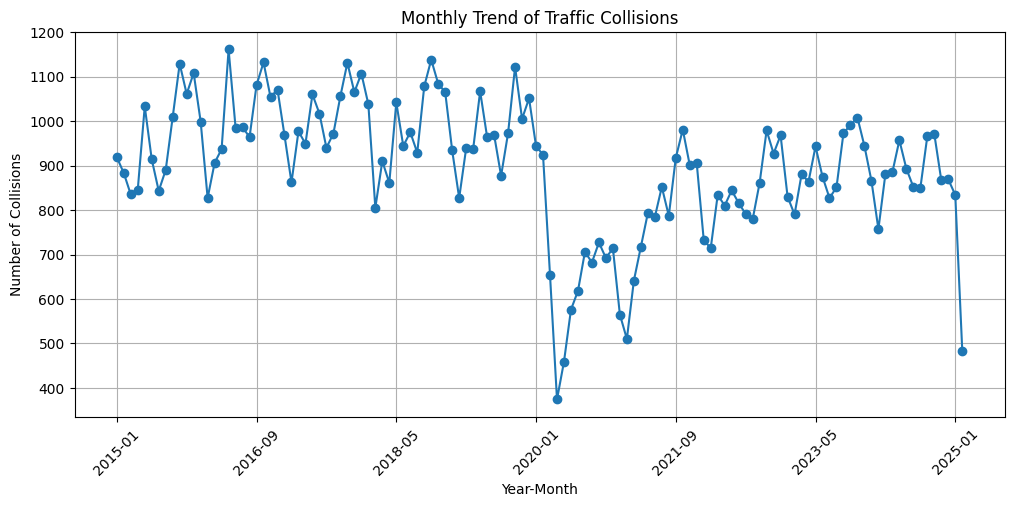

In [ ]:
# 1. Analyze Trends in Traffic Collisions Over Time
crash_date_time_column = next(col for col in crash_df.columns if 'crash_date' in col and 'time' in col)
crash_df['Year-Month'] = crash_df[crash_date_time_column].dt.strftime('%Y-%m')

monthly_trend = crash_df.groupby('Year-Month').size()

plt.figure(figsize=(12, 5))
monthly_trend.plot(title="Monthly Trend of Traffic Collisions", marker='o')
plt.xlabel("Year-Month")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.grid()
plt.show()

                              Intrepretation
    
    Traffic Collisions Trend (Monthly)


Sharp drop in early 2020 due to COVID-19 lockdowns.

Gradual recovery from mid-2020, but levels stayed below pre-pandemic averages.

Pre-2020: Fairly stable with seasonal peaks and dips.

Recent dip in 2025 may be due to incomplete data or seasonal effects.

 ---Locations with highest crash rates (Top 10 crash-prone intersections)

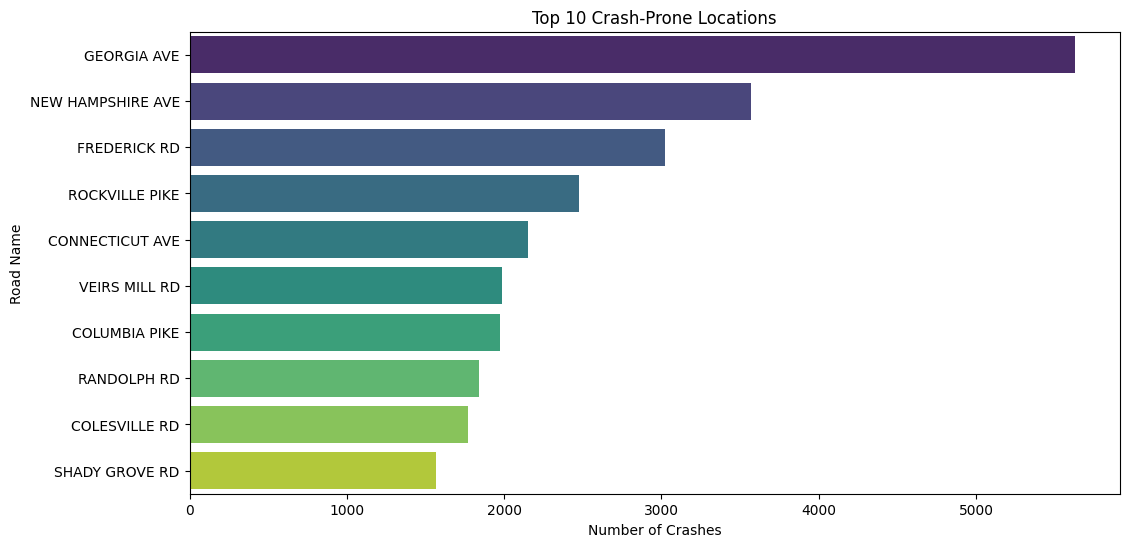

In [ ]:
# 2. Locations with highest crash rates (Top 10 crash-prone intersections)
plt.figure(figsize=(12, 6))
sns.countplot(y=crash_df['road_name'], order=crash_df['road_name'].value_counts().index[:10], palette="viridis")
plt.title("Top 10 Crash-Prone Locations")
plt.xlabel("Number of Crashes")
plt.ylabel("Road Name")
plt.show()

                                 Interpretation

***Top 10 Crash-Prone Locations Georgia Ave leads significantly with the most crashes.

New Hampshire Ave and Frederick Rd follow, forming the top 3 high-risk roads.

All listed roads are major thoroughfares, likely with high traffic volume.

Suggests a need for targeted road safety improvements on these corridors.

                                                    **Interpretation**

In [ ]:
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_excel("Cleaned_Crash_Reporting_Incidents_Data.xlsx", sheet_name="Sheet1")
df = df.dropna(subset=['latitude', 'longitude'])

# Create the base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10) # Create a Folium map object

# Now you can use m
m.fit_bounds([[df['latitude'].min(), df['longitude'].min()],
              [df['latitude'].max(), df['longitude'].max()]])






# Add heatmap layer
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=12).add_to(m)

# Add a legend (HTML)
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 220px; height: 110px;
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <b>Crash Density Legend</b><br>
     <i style="background: #00f; width: 20px; height: 10px; display: inline-block;"></i>&nbsp;Low Density<br>
     <i style="background: #0ff; width: 20px; height: 10px; display: inline-block;"></i>&nbsp;Medium Density<br>
     <i style="background: #0f0; width: 20px; height: 10px; display: inline-block;"></i>&nbsp;High Density<br>
     <i style="background: #ff0; width: 20px; height: 10px; display: inline-block;"></i>&nbsp;Very High<br>
     <i style="background: #f00; width: 20px; height: 10px; display: inline-block;"></i>&nbsp;Extreme<br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save("montgomery_crash_heatmap_with_legend.html")
m

                    **  Interpretation **

The areas with the highest crash density, shown in red and yellow, are Gaithersburg, Rockville, and Germantown. Silver Spring also indicates a very high crash concentration. Also, Areas like Poolesville, North Potomac, and Olney show moderate crash density (green). In addition, Peripheral zones like Leesburg, Annapolis, and Bowie exhibit low crash activity (blue or barely visible).

                                                 Density of number of locations

In [ ]:


# Load the dataset
df = pd.read_excel("Cleaned_Crash_Reporting_Incidents_Data.xlsx", sheet_name="Sheet1")

# Step 1: Clean and prepare data
df = df.dropna(subset=['latitude', 'longitude'])
df['lat_rounded'] = df['latitude'].round(3)
df['lon_rounded'] = df['longitude'].round(3)

# Step 2: Count crashes at each location
density_counts = df.groupby(['lat_rounded', 'lon_rounded']).size().reset_index(name='crash_count')

# Step 3: Define a function for density classification
def classify_density(count):
    if count <= 50:
        return 'Low (Blue)'
    elif count <= 100:
        return 'Medium (Cyan)'
    elif count <= 150:
        return 'High (Green)'
    elif count <= 200:
        return 'Very High (Yellow)'
    else:
        return 'Extreme (Red)'

# Step 4: Apply classification
density_counts['density_level'] = density_counts['crash_count'].apply(classify_density)

# Step 5: Count how many locations per density level
density_summary = density_counts['density_level'].value_counts().reset_index()
density_summary.columns = ['Density Level', 'Number of Locations']

# Display result
print(density_summary)


        Density Level  Number of Locations
0          Low (Blue)                22047
1       Medium (Cyan)                  188
2        High (Green)                   27
3  Very High (Yellow)                    2
4       Extreme (Red)                    1


                        **Peak hours for traffic **accidents

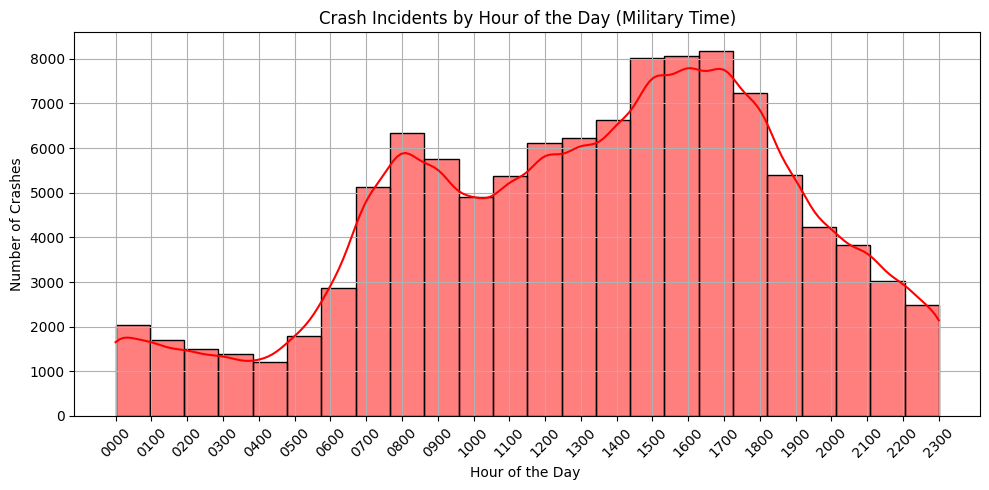

In [ ]:

df['crash_date_time'] = pd.to_datetime(df['crash_date_time'], errors='coerce')
df['hour'] = df['crash_date_time'].dt.hour
military_labels = [f"{h:02}00" for h in range(24)]
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'].dropna(), bins=24, kde=True, color='red')
plt.title("Crash Incidents by Hour of the Day (Military Time)")
plt.xlabel("Hour of the Day ")
plt.ylabel("Number of Crashes")
plt.xticks(ticks=np.arange(0, 24), labels=military_labels, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


                  Interpretation

Crash Incidents by Hour of the Day
Morning spike starts around 7 AM, peaking near 8 AM — likely due to commute traffic.

A second, higher peak occurs between 3 PM and 6 PM, with the highest crash count around 5 PM, matching afternoon rush hour.

Crashes drop off steadily after 7 PM, reaching the lowest levels in the early morning hours (2–5 AM).

                                              Crash incidents by days of weeks

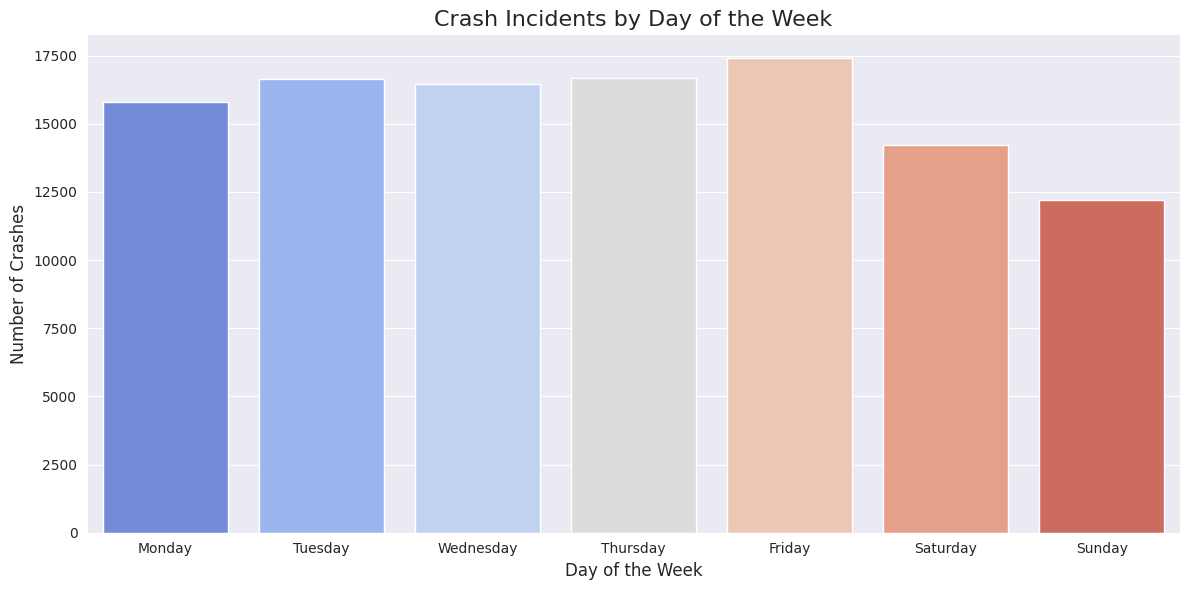

In [ ]:

date_column = next(col for col in df.columns if 'date' in col.lower())
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
df['day_of_week'] = df[date_column].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crash_counts = df['day_of_week'].value_counts().reindex(day_order)
sns.set_style("darkgrid")
colors = sns.color_palette("coolwarm", 7)
plt.figure(figsize=(12, 6))
sns.barplot(x=crash_counts.index, y=crash_counts.values, palette=colors)
plt.title("Crash Incidents by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.tight_layout()
plt.show()


                          Interpretation

Crash Incidents by Day of the Week
The bar chart shows that crash incidents are most frequent on weekdays, especially on Friday, followed by Tuesday, Thursday, and Wednesday. Crashes are less common on weekends, with Sunday having the lowest number of incidents. This pattern suggests that weekday traffic volume, possibly due to commuting and work-related travel, contributes to a higher number of crashes

                                                       CHI-SQUARE

                       Is road type significantly associated with hit-and-run occurrence in crash incidents?  (Chi-Square)

In [ ]:
import pandas as pd

# Extract relevant columns and drop missing values
crash_test_df = crash_df[['hit_run', 'route_type']].dropna()
contingency_table = pd.crosstab(crash_test_df['hit_run'], crash_test_df['route_type'])

# Select top 5 route types
top_5_routes = contingency_table.sum(axis=0).sort_values(ascending=False).head(5).index
contingency_top5 = contingency_table[top_5_routes]

# Define color map
row_colors = {
    'No': 'background-color: lightblue',
    'Unknown': 'background-color: orange',
    'Yes': 'background-color: lightgreen'
}

# Function to apply colors row-wise
def highlight_rows(row):
    return [row_colors.get(row.name, '')] * len(row)

# Apply styling
styled_table = contingency_top5.style.apply(highlight_rows, axis=1).set_caption("Frequency Table: Hit-and-Run by Top 5 Road Types")

# To display in Jupyter Notebook or Colab, just type:
styled_table


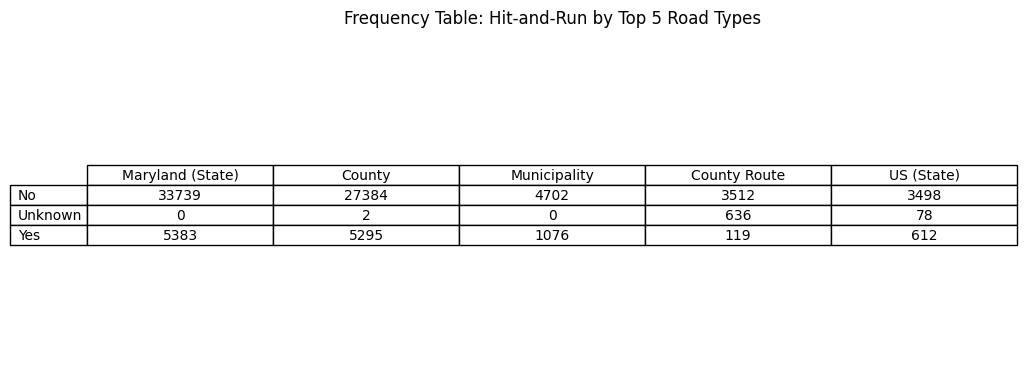

                                                               Ballon plot

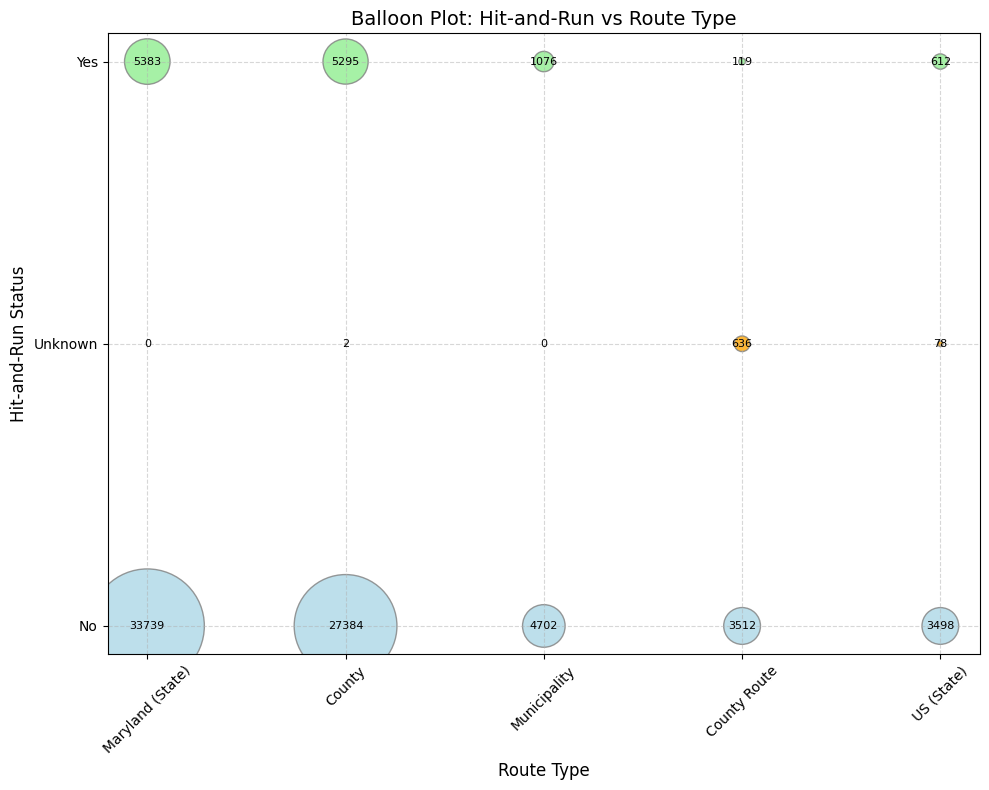

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your contingency table data
data = {
    'Maryland (State)': [33739, 0, 5383],
    'County': [27384, 2, 5295],
    'Municipality': [4702, 0, 1076],
    'County Route': [3512, 636, 119],
    'US (State)': [3498, 78, 612]
}
index = ['No', 'Unknown', 'Yes']
df = pd.DataFrame(data, index=index)

# Convert to long format
df_long = df.reset_index().melt(id_vars='index', var_name='Route Type', value_name='Count')
df_long.rename(columns={'index': 'Hit-and-Run'}, inplace=True)

# Define color map
color_map = {
    'No': 'lightblue',
    'Unknown': 'orange',
    'Yes': 'lightgreen'
}
df_long['Color'] = df_long['Hit-and-Run'].map(color_map)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot
scatter = ax.scatter(
    x=df_long['Route Type'],
    y=df_long['Hit-and-Run'],
    s=df_long['Count'] / 5,  # Adjust size scaling here if needed
    c=df_long['Color'],
    edgecolors='gray',
    alpha=0.8
)

# Add labels and titles
ax.set_title('Balloon Plot: Hit-and-Run vs Route Type', fontsize=14)
ax.set_xlabel('Route Type', fontsize=12)
ax.set_ylabel('Hit-and-Run Status', fontsize=12)
plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)

# Add value labels inside the bubbles
for i in range(len(df_long)):
    ax.text(
        df_long['Route Type'][i],
        df_long['Hit-and-Run'][i],
        f"{df_long['Count'][i]}",
        color='black',
        ha='center',
        va='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()


                                                 Chi-square between hit and run and route type

In [ ]:

crash_test_df = crash_df[['hit_run', 'route_type']].dropna()
crash_test_df['hit_run'] = pd.Categorical(crash_test_df['hit_run'])
crash_test_df['route_type'] = pd.Categorical(crash_test_df['route_type'])
contingency_table = pd.crosstab(
    index=crash_test_df['hit_run'],
    columns=crash_test_df['route_type'],
    values=np.ones(len(crash_test_df)),
    aggfunc='sum'
).fillna(0)

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Summarize results
chi_square_summary = pd.DataFrame({
    'Chi-Square Statistic': [chi2],
    'Degrees of Freedom': [dof],
    'P-Value': [p]
})
print("Chi-Square Test Summary: Hit-and-Run vs. Road Type")
print(chi_square_summary)


Chi-Square Test Summary: Hit-and-Run vs. Road Type
   Chi-Square Statistic  Degrees of Freedom  P-Value
0          12769.221958                  36      0.0


                          Interpretation

Hit-and-Run vs. Route Type
The frequency table and balloon plot show that Maryland (State) and County roads have the highest number of both hit-and-run and non-hit-and-run incidents. The balloon plot highlights this visually with larger circles, especially under the "No" category.

The Chi-square test p-value is 0, indicating a statistically significant association between route type and hit-and-run status. In other words, the likelihood of hit-and-run varies by road type, and this difference is not due to random chance.

Conclusion:
There is a significant relationship between road type and hit-and-run behavior, especially with high occurrences on Maryland (State) and County roads.

                            **Number of crime by cites **

In [ ]:

# Group and count crimes by city
top_cities = crime_df['city'].value_counts().head(10)

# Turn into a DataFrame
top_cities_df = top_cities.reset_index()
top_cities_df.columns = ['City', 'Number_of_Crimes']

print(top_cities_df)


                 City  Number_of_Crimes
0       SILVER SPRING            152597
1        GAITHERSBURG             62562
2           ROCKVILLE             60748
3          GERMANTOWN             42173
4            BETHESDA             30878
5         TAKOMA PARK             14382
6  MONTGOMERY VILLAGE             12974
7         CHEVY CHASE              8710
8             POTOMAC              8590
9             DERWOOD              7041


                              Interpretation

Silver Spring leads with the highest crime count, followed by Gaithersburg and Rockville. Smaller cities like Derwood and Potomac report the lowest. Crime is concentrated in major urban areas

Goal 2 : 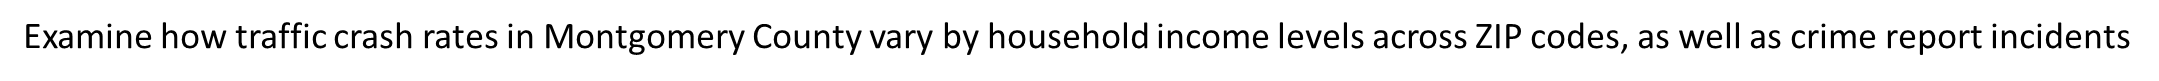

                              Relationship Between Nedian household Income And Crash Counts By Region

**                                         Create Pseudo zip code using rounded Latitude**

we create a pseudo Zip code because crime dataset and crash do not have zip code but each entry has a latitude value (geogrphic position)

In [ ]:
# Step 1: Create pseudo-ZIP using rounded latitude
crime_df['zip_like'] = crime_df['latitude'].round(2).astype(str)
crash_df['zip_like'] = crash_df['latitude'].round(2).astype(str)

# Step 2: Count crimes and crashes per region
crime_counts = crime_df['zip_like'].value_counts().reset_index()
crime_counts.columns = ['zip_like', 'crime_count']

crash_counts = crash_df['zip_like'].value_counts().reset_index()
crash_counts.columns = ['zip_like', 'crash_count']

# Step 3: Merge both counts into one DataFrame
combined_df = pd.merge(crime_counts, crash_counts, on='zip_like', how='inner')

# Step 4: Add a new column for total incidents
combined_df['combined'] = combined_df['crime_count'] + combined_df['crash_count']

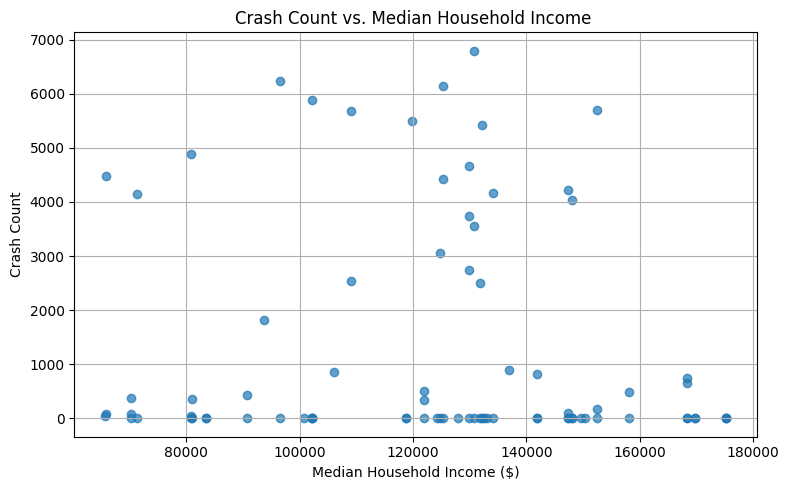

In [ ]:
# Assuming you already have salary_df and crash_df loaded

# Step 1: Convert ZIP columns to string for consistency
salary_df['zip_code'] = salary_df['zip_code'].astype(str)
crash_df['zip_like'] = crash_df['latitude'].round(2).astype(str)

# Step 2: Count crashes by pseudo-ZIP
crash_counts = crash_df['zip_like'].value_counts().reset_index()
crash_counts.columns = ['zip_like', 'crash_count']

# Step 3: Prepare merged dataframe
merged_df = crash_counts.copy()

# Sample ZIP codes (with replacement) to match crash data (placeholder step)
merged_df['zip_code'] = salary_df['zip_code'].sample(n=len(merged_df), random_state=1, replace=True).values

# Merge with salary data
merged_df = merged_df.merge(salary_df, on='zip_code', how='left')

# Drop any missing income data
merged_df.dropna(subset=['median_household_income'], inplace=True)

# Step 4: Plot Median Income vs. Crash Count (scatter only)
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['median_household_income'], merged_df['crash_count'], alpha=0.7)

plt.title('Crash Count vs. Median Household Income ')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Crash Count')
plt.grid(True)
plt.tight_layout()
plt.show()

                                    Intepretation

                     **  Correlation matrix **

In [ ]:
import pandas as pd
# Calculate correlation matrix (only for numeric columns)
corr_matrix = merged_df[['median_household_income', 'crash_count']].corr()
# Display the matrix
print(corr_matrix)


                         median_household_income  crash_count
median_household_income                 1.000000    -0.082181
crash_count                            -0.082181     1.000000


                         Visualization

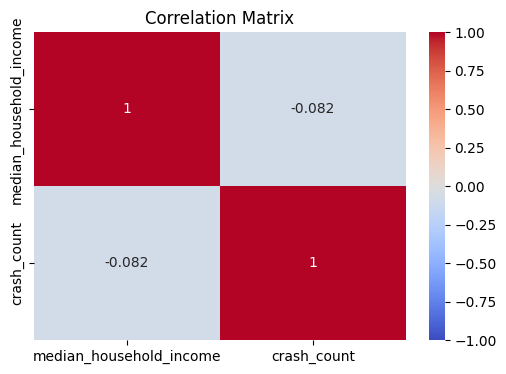

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


                   Interpretation

Red = strong positive

 Blue = strong negative

Gray/white = no correlation



                                   Overall interpretation of Crash Count vs. Median Household Income


   

                                                          Intterpretation

There is no strong linear relationship between median household income and crash count in Montgomery County. Both the correlation matrix (−0.082) and scatter plot suggest that income alone is not a reliable predictor of crash frequency across regions.

possibly due to:

Denser traffic

Older infrastructure

Limited access to traffic safety improvements

**                                     Relationship Between Crime And Crash Counts By Region**

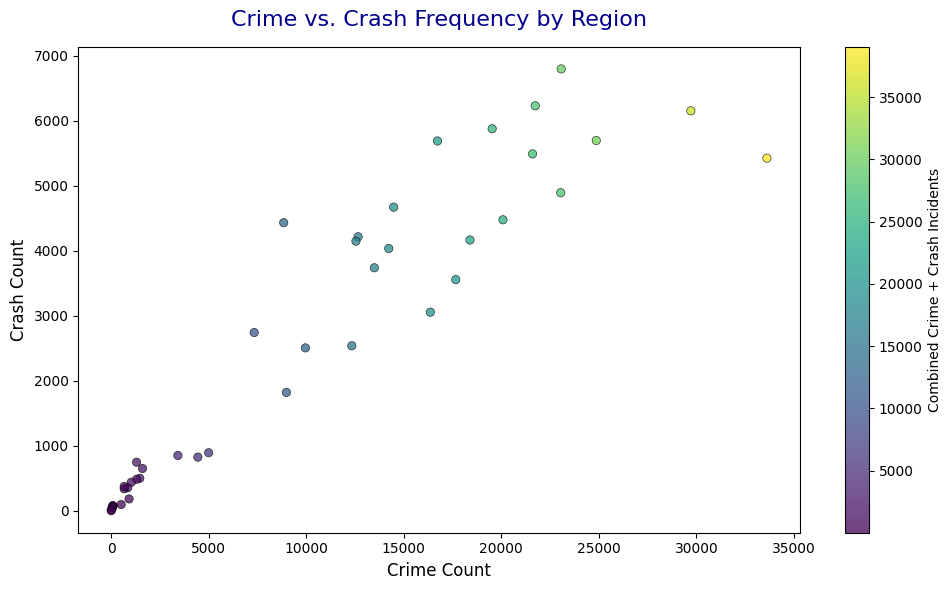

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    combined_df['crime_count'],
    combined_df['crash_count'],
    c=combined_df['combined'],        # color by total incidents
    cmap='viridis',                   # color scale from purple to yellow
    alpha=0.75,
    edgecolors='black',
    linewidth=0.5
)

# Titles and labels
plt.title('Crime vs. Crash Frequency by Region', fontsize=16, color='darkblue', pad=15)
plt.xlabel('Crime Count', fontsize=12)
plt.ylabel('Crash Count', fontsize=12)

# Add color bar with label
cbar = plt.colorbar(scatter)
cbar.set_label('Combined Crime + Crash Incidents', fontsize=10)

# Final layout and display
plt.tight_layout()
plt.show()


                                   Interpretation

Each dot = a pseudo-region (created by rounding latitude)

Dark purple → low combined incidents.

Blue-green (middle) → medium combined incidents

Yellow → high combined incidents.





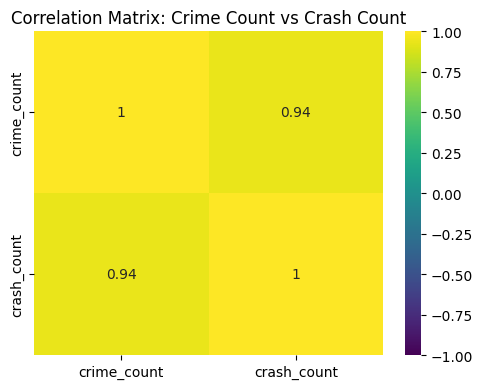

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = combined_df[['crime_count', 'crash_count']].corr()

# Plot the heatmap with viridis
plt.figure(figsize=(5, 4))
sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',        # MATCH scatter plot color palette
    vmin=-1, vmax=1,       # Keep full correlation range
    center=0,
    cbar=True
)

plt.title('Correlation Matrix: Crime Count vs Crash Count', fontsize=12)
plt.tight_layout()
plt.show()


                                  Interpretation

The scatter plot and correlation matrix both show a strong positive relationship between crime and crash counts across regions. The correlation value of 0.94 confirms that areas with higher crime also tend to have more traffic crashes. This suggests shared risk factors like population density or infrastructure challenges.




                                                                         overall project

--High crash rates are strongly associated with high-crime areas, particularly in urban centre's

--Income levels show little to no impact on crash

--Most crashes occurs during rush hours and on weekdays

--Hit and RUN are more frequent on Maryland state and county roads

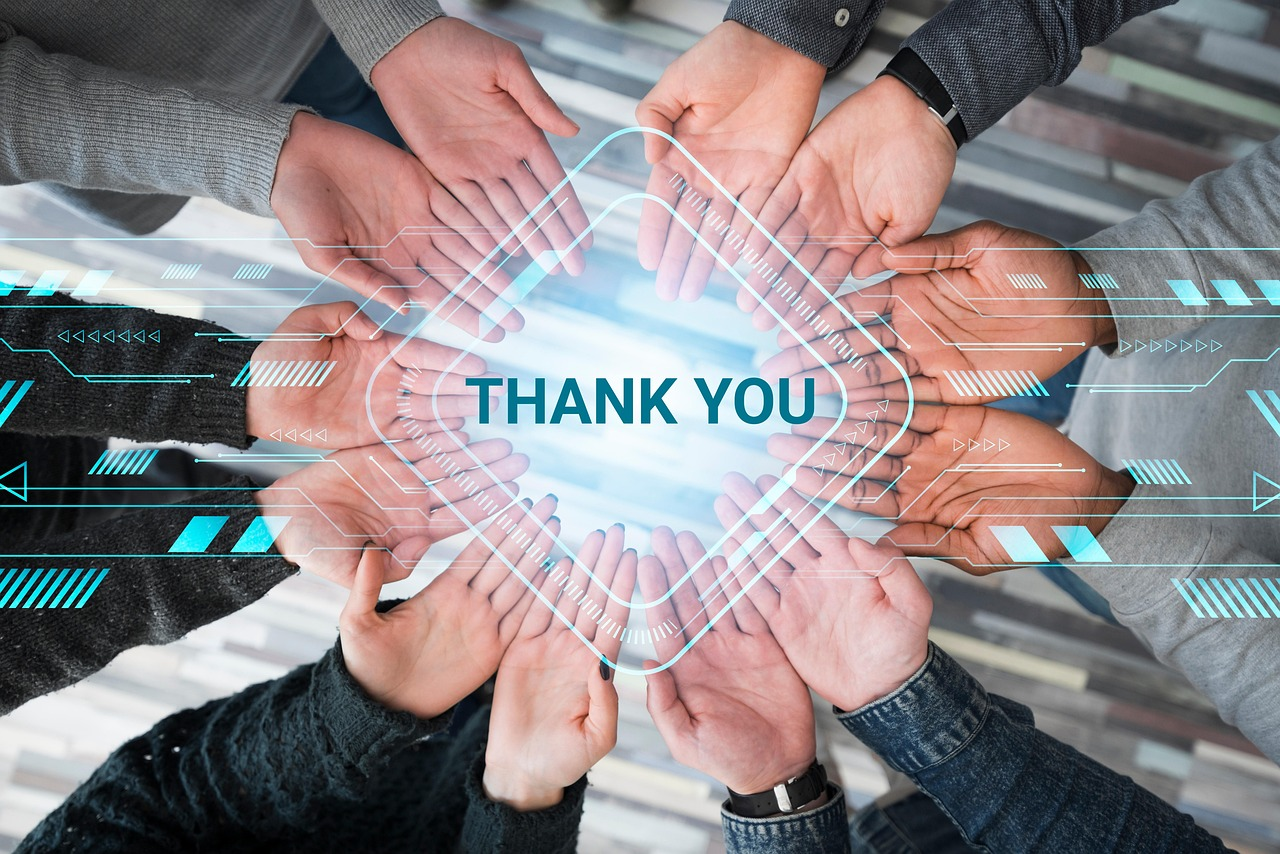